In [4]:
#Варіант 4
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

In [5]:
#Завдання 1:
data = pd.read_csv('D:/Учеба/Машинне Навчання/Lab5/bikes_rent.csv',  encoding = "ISO-8859-1")
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


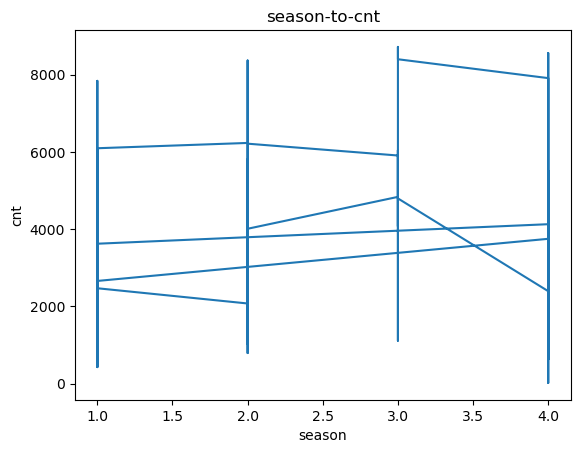

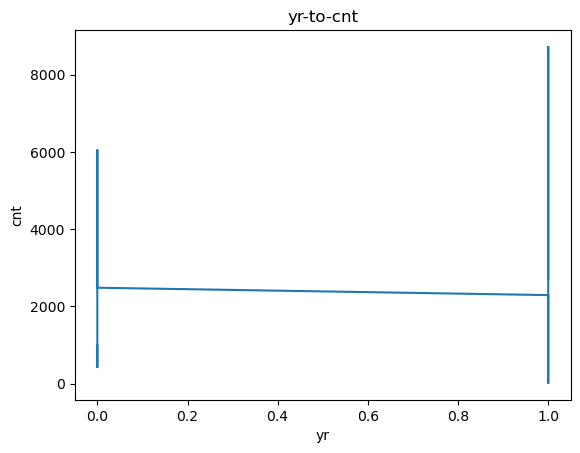

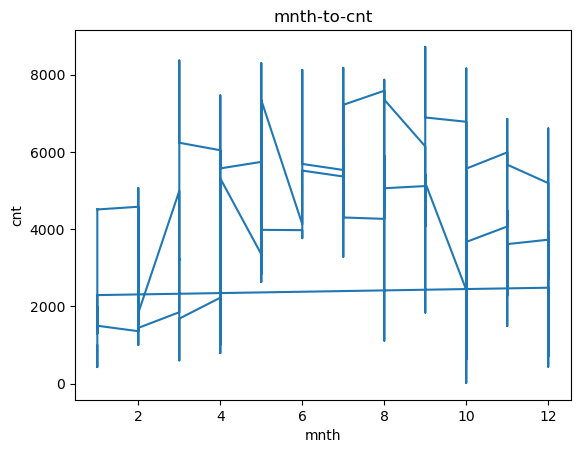

In [6]:
#Побудуйте графіки залежностей атрибутів від кількості подорожей
#1
plt.plot(data['season'], data['cnt'])
plt.xlabel('season')
plt.ylabel('cnt')
plt.title("season-to-cnt")
plt.show()
#2
plt.plot(data['yr'], data['cnt'])
plt.xlabel('yr')
plt.ylabel('cnt')
plt.title("yr-to-cnt")
plt.show()
#3
plt.plot(data['mnth'], data['cnt'])
plt.xlabel('mnth')
plt.ylabel('cnt')
plt.title("mnth-to-cnt")
plt.show()

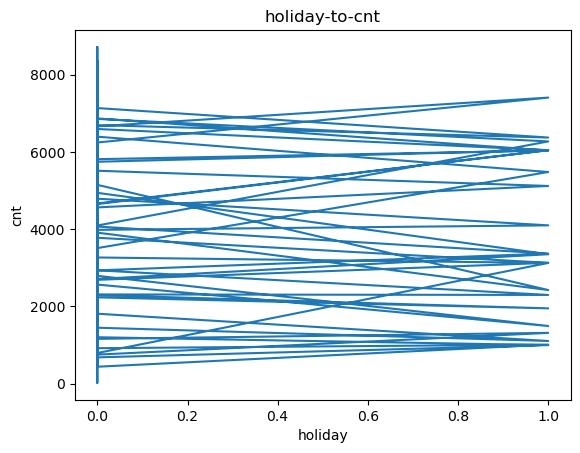

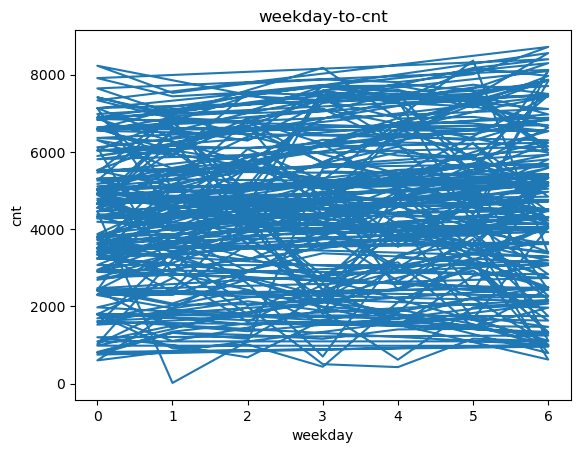

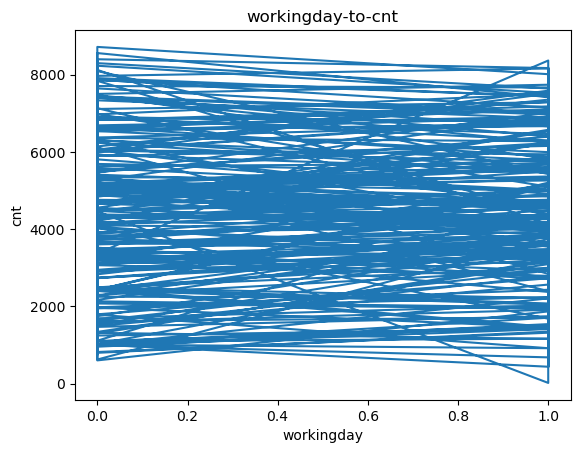

In [7]:
#4
plt.plot(data['holiday'], data['cnt'])
plt.xlabel('holiday')
plt.ylabel('cnt')
plt.title("holiday-to-cnt")
plt.show()
#5
plt.plot(data['weekday'], data['cnt'])
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.title("weekday-to-cnt")
plt.show()
#6
plt.plot(data['workingday'], data['cnt'])
plt.xlabel('workingday')
plt.ylabel('cnt')
plt.title("workingday-to-cnt")
plt.show()

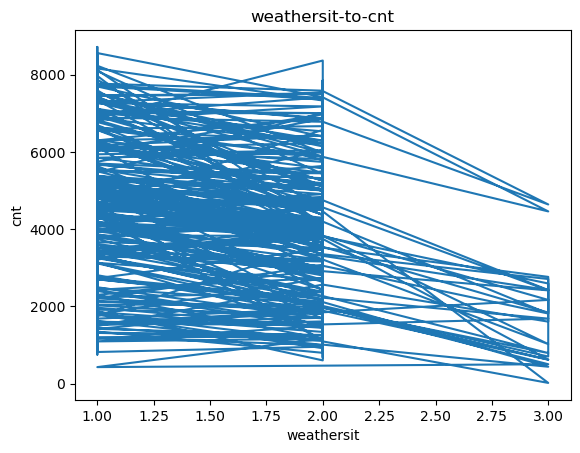

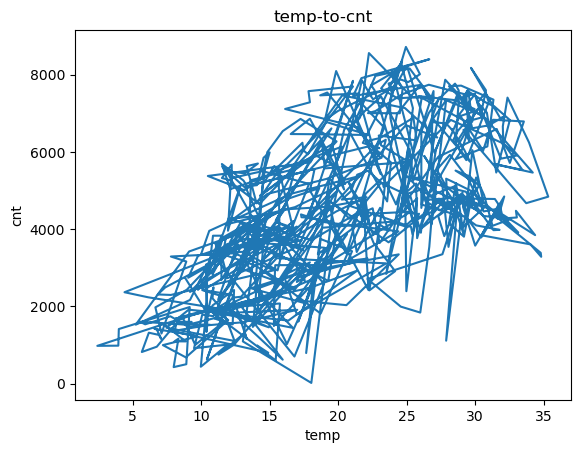

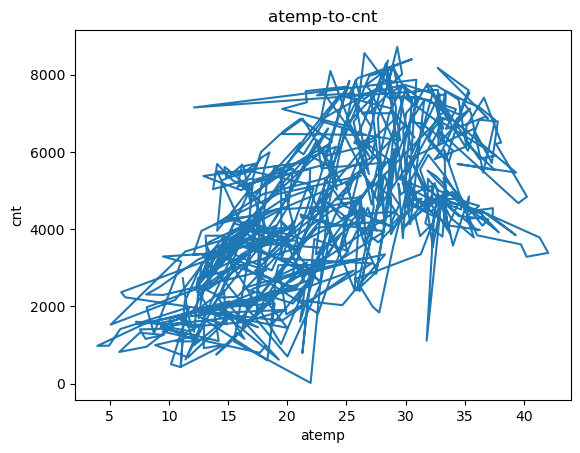

In [8]:
#7
plt.plot(data['weathersit'], data['cnt'])
plt.xlabel('weathersit')
plt.ylabel('cnt')
plt.title("weathersit-to-cnt")
plt.show()
#8
plt.plot(data['temp'], data['cnt'])
plt.xlabel('temp')
plt.ylabel('cnt')
plt.title("temp-to-cnt")
plt.show()
#9
plt.plot(data['atemp'], data['cnt'])
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.title("atemp-to-cnt")
plt.show()

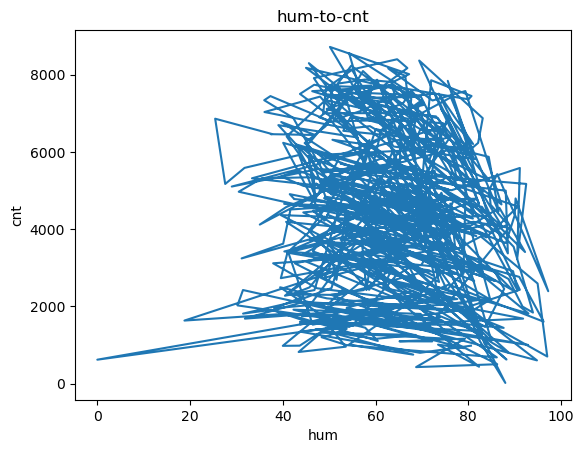

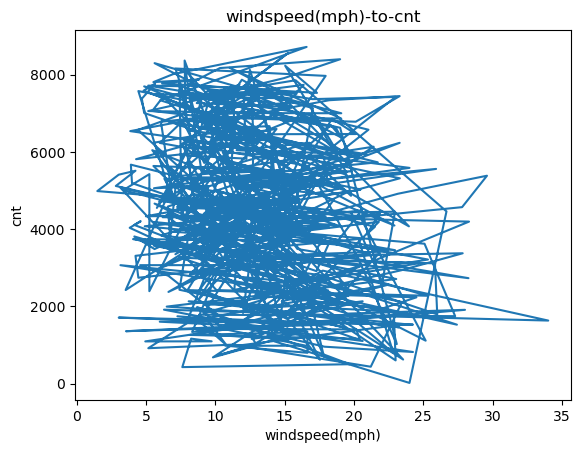

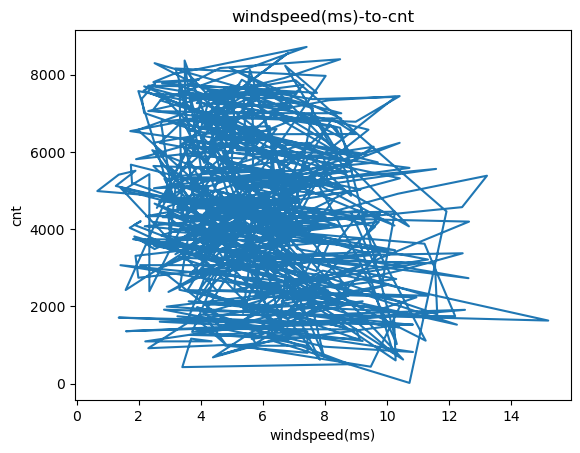

In [9]:
#10
plt.plot(data['hum'], data['cnt'])
plt.xlabel('hum')
plt.ylabel('cnt')
plt.title("hum-to-cnt")
plt.show()
#11
plt.plot(data['windspeed(mph)'], data['cnt'])
plt.xlabel('windspeed(mph)')
plt.ylabel('cnt')
plt.title("windspeed(mph)-to-cnt")
plt.show()
#12
plt.plot(data['windspeed(ms)'], data['cnt'])
plt.xlabel('windspeed(ms)')
plt.ylabel('cnt')
plt.title("windspeed(ms)-to-cnt")
plt.show()

In [10]:
#Який характер залежності кількості прокатів від місяця?
#Відповідь: Найбільше подорожей у березні, травні, липні та вересні. Найменше подорожей взимку.
#Вкажіть одну чи дві ознаки, від яких кількість прокатів швидше за все залежить лінійно
#Відповідь: Робочі дні та відпустки/канікули

In [11]:
#Завдання 2: Порахуйте кореляції всіх ознак, крім останньої, з останнім за допомогою методу corrwith.
d1 = data['cnt'].copy()
d2 = data.loc[:, data.columns != 'cnt']
d2.corrwith(d1)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [12]:
#Завдання 3: Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) та cnt за допомогою методу corr
d3 = data[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].copy()
d3.corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


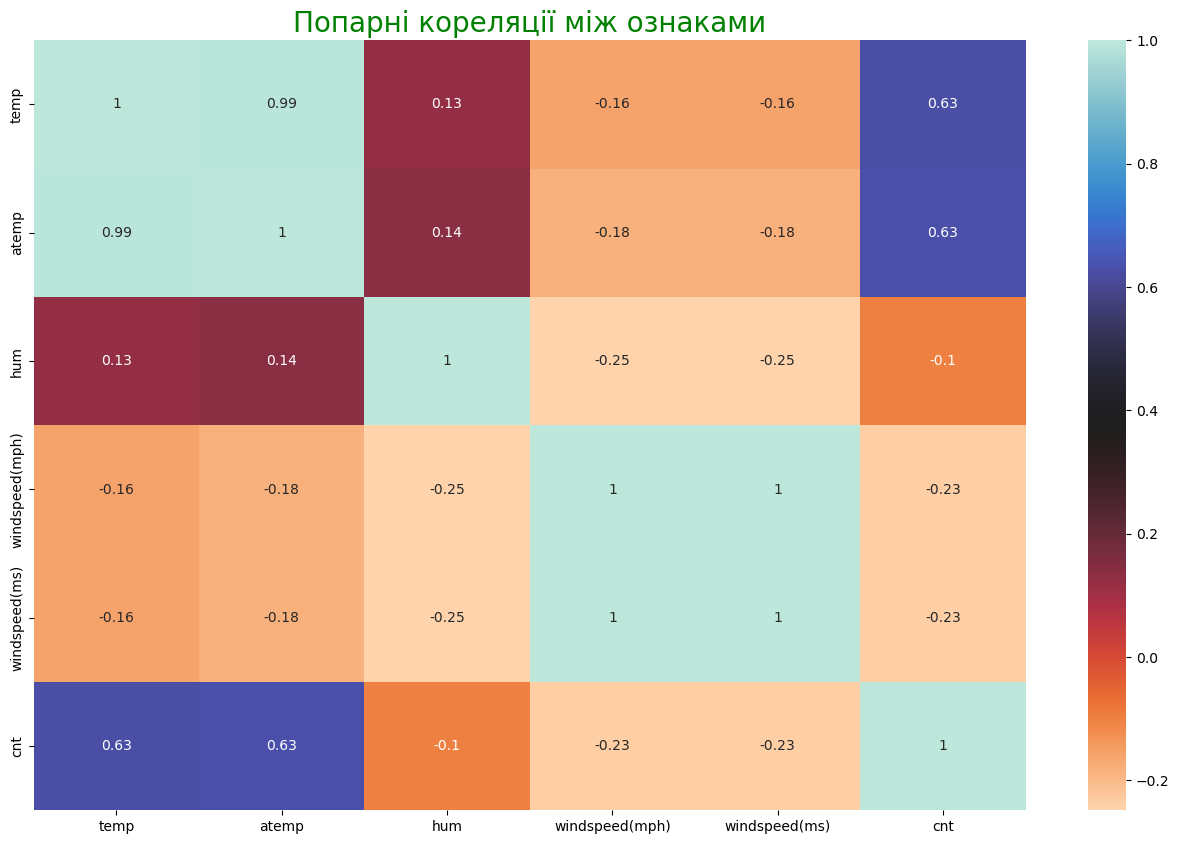

In [13]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(data.iloc[:, 7:].corr(), annot=True, cmap='icefire_r')
plt.title('Попарні кореляції між ознаками', fontsize=20, color='g')
plt.show()

In [14]:
print("season: ", data['season'].mean())
print("yr: ", data['yr'].mean())
print("mnth: ", data['mnth'].mean())
print("holiday: ", data['holiday'].mean())
print("weekday: ", data['weekday'].mean())
print("workingday: ", data['workingday'].mean())
print("weathersit: ", data['weathersit'].mean())
print("temp: ", data['temp'].mean())
print("atemp: ", data['atemp'].mean())
print("hum: ", data['hum'].mean())
print("windspeed(mph): ", data['windspeed(mph)'].mean())
print("windspeed(ms): ", data['windspeed(ms)'].mean())
print("cnt: ", data['cnt'].mean())

season:  2.496580027359781
yr:  0.5006839945280438
mnth:  6.519835841313269
holiday:  0.028727770177838577
weekday:  2.997264021887825
workingday:  0.6839945280437757
weathersit:  1.3953488372093024
temp:  20.31077632886457
atemp:  23.717699432284544
hum:  62.78940629274965
windspeed(mph):  12.762576179069768
windspeed(ms):  5.705219570438215
cnt:  4504.3488372093025


In [15]:
data_shuffled = shuffle(data, random_state=42)
X = scale(data_shuffled[data_shuffled.columns[:-1]])
y = data_shuffled["cnt"]

In [16]:
reg = LinearRegression().fit(X, y)
[i for i in list(zip(data.columns, reg.coef_))]

[('season', 570.8674889862766),
 ('yr', 1021.9645159780381),
 ('mnth', -141.30356420478935),
 ('holiday', -86.75926356396214),
 ('weekday', 137.22578660883255),
 ('workingday', 56.3913311383312),
 ('weathersit', -330.2297697024501),
 ('temp', 367.4787098469888),
 ('atemp', 585.5515377590608),
 ('hum', -145.61340408928012),
 ('windspeed(mph)', 12456110242934.967),
 ('windspeed(ms)', -12456110243133.432)]

In [17]:
lasso = Lasso().fit(X, y)
[i for i in list(zip(data.columns, lasso.coef_))]

[('season', 560.2416160308857),
 ('yr', 1019.4634940657195),
 ('mnth', -128.73062703678693),
 ('holiday', -86.15278133371105),
 ('weekday', 137.34789390496329),
 ('workingday', 55.21237064135678),
 ('weathersit', -332.3698569623487),
 ('temp', 376.36323620969864),
 ('atemp', 576.530793504551),
 ('hum', -144.12915500348578),
 ('windspeed(mph)', -197.1396894024843),
 ('windspeed(ms)', -2.805139889577359e-08)]

In [18]:
ridge = Ridge().fit(X, y)
[i for i in list(zip(data.columns, ridge.coef_))]

[('season', 563.0645722520163),
 ('yr', 1018.948378787529),
 ('mnth', -131.87332028247602),
 ('holiday', -86.74609799709256),
 ('weekday', 138.0051111787189),
 ('workingday', 55.903110375064436),
 ('weathersit', -332.34978849907293),
 ('temp', 386.4578891919372),
 ('atemp', 566.3470470600387),
 ('hum', -145.07132729867263),
 ('windspeed(mph)', -99.25944108187153),
 ('windspeed(ms)', -99.25944115426178)]

In [21]:
#Завдання 7: Для кожного значення коефіцієнта з alphas навчіть регресор Lasso і запишіть ваги список coefs_lasso, 
#а потім навчіть Ridge і запишіть ваги в список coefs_ridge' Конвертуйте отримані списки в np.array.
alphas = np.arange(1, 500, 50)

coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

for index, a in enumerate(alphas):
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    coefs_lasso[index] = lasso.coef_

for index, a in enumerate(alphas):
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs_ridge[index] = ridge.coef_

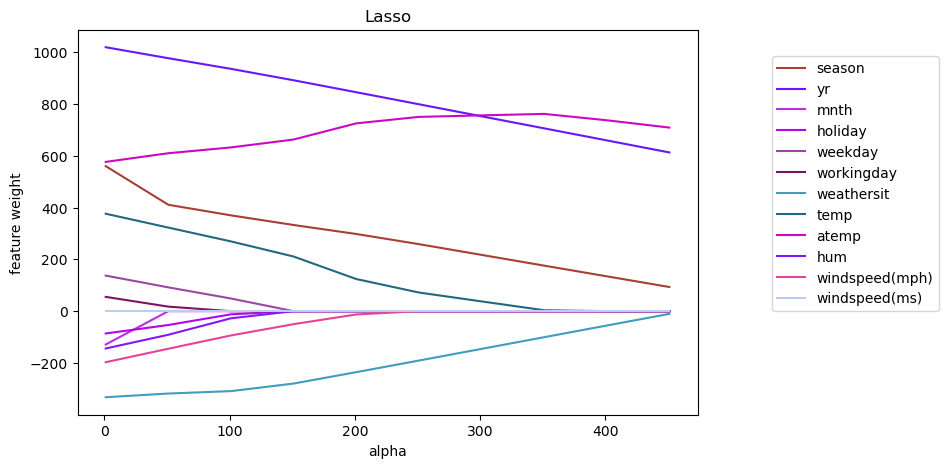

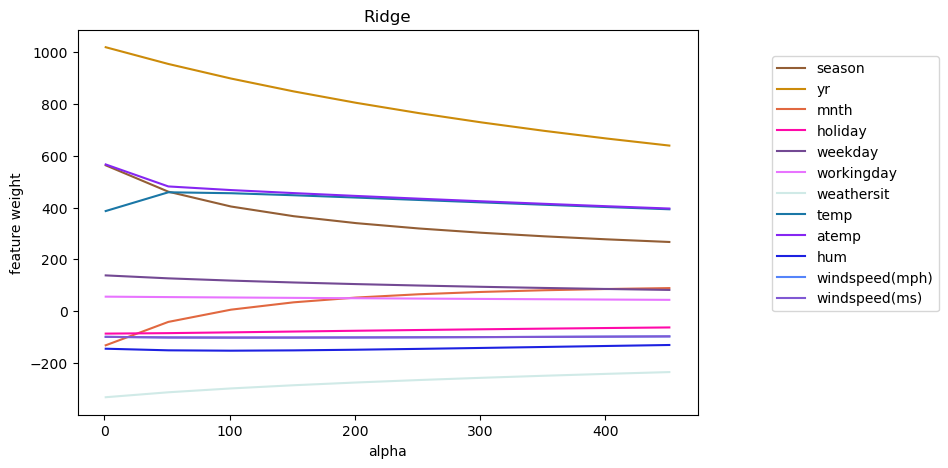

In [23]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

In [24]:
#Проаналізуйте графіки та дайте відповіді на такі запитання.

#Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при тому самому alpha?
#Відповідь: Lasso
#Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть чому так відбувається.
#Відповідь: Вони наближаються до 0
#Чи можна стверджувати, що Lasso виключає одну з ознак windspeed за будь-якого значення alpha > 0? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт за нього менше  10−3
#Відповідь: Так; Так;
#Який із регуляризаторів підійде для відбору неінформативних ознак?
#Відповідь: Lasso

In [25]:
#Завдання 8: Навчіть регресор LassoCV на всіх параметрах регуляризації з alpha. 
#Побудуйте графік усередненого за рядками MSE залежно від alpha (використовуйте для цього функцію create_plot).
#Виведіть вибране alpha, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [26]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = map(lambda e: e[0], data)
    y = map(lambda e: e[1], data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

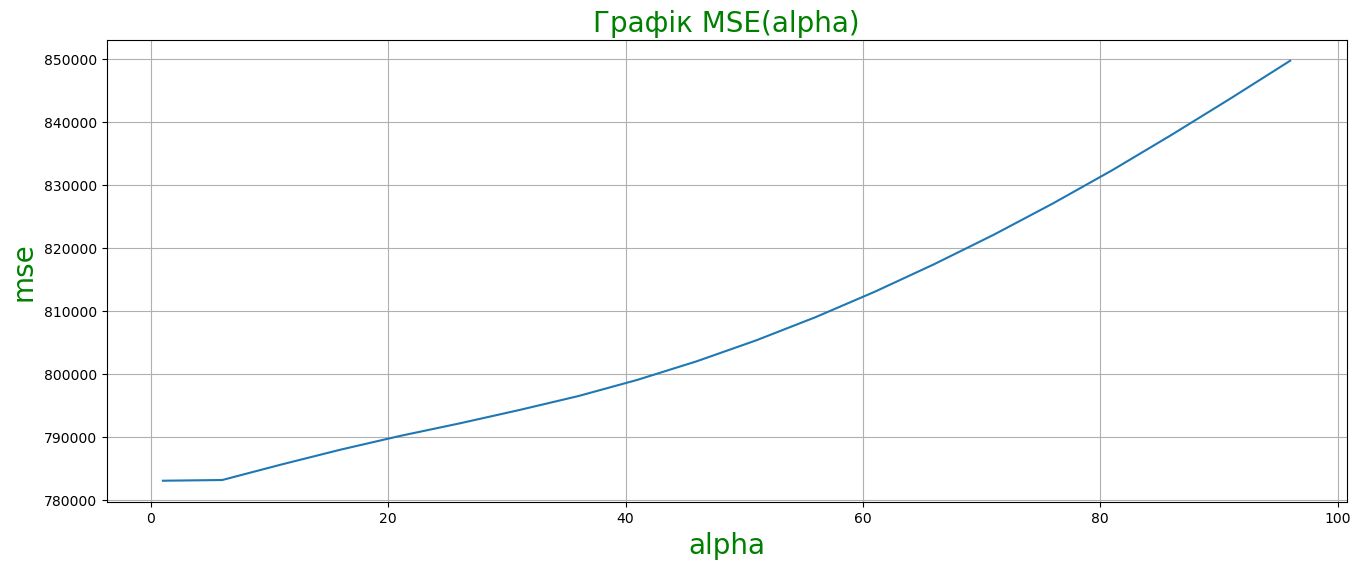

Alpha = 1


[('season', 560.2416160308857),
 ('yr', 1019.4634940657195),
 ('mnth', -128.73062703678693),
 ('holiday', -86.15278133371105),
 ('weekday', 137.34789390496329),
 ('workingday', 55.21237064135678),
 ('weathersit', -332.3698569623487),
 ('temp', 376.36323620969864),
 ('atemp', 576.530793504551),
 ('hum', -144.12915500348578),
 ('windspeed(mph)', -197.1396894024843),
 ('windspeed(ms)', -2.805139889577359e-08)]

In [28]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor =  LassoCV(alphas=alphas).fit(X, y)

mse = [i.mean() for i in regressor.mse_path_]

plt.rcParams["figure.figsize"] = (16, 6)
plt.plot(regressor.alphas_, mse)
plt.title('Графік MSE(alpha)', fontsize=20, color='g')
plt.xlabel("alpha", fontsize=20, color='g')
plt.ylabel("mse", fontsize=20, color='g')
plt.grid()
plt.show()

print(f'Alpha = {regressor.alpha_}')
[i for i in list(zip(data.columns, regressor.coef_))]

In [29]:
#Завдання 9: Виведіть значення alpha, що відповідають мінімумам MSE на кожному розбиття (тобто по стовпцях). 
#На трьох окремих графіках візуалізуйте стовпці mse_path_.

Alpha = 1, MSE = 691447.2507878074
Alpha = 11, MSE = 883471.1829425404
Alpha = 1, MSE = 710110.1624117346
Alpha = 26, MSE = 860737.4059488716
Alpha = 21, MSE = 750676.3567789996


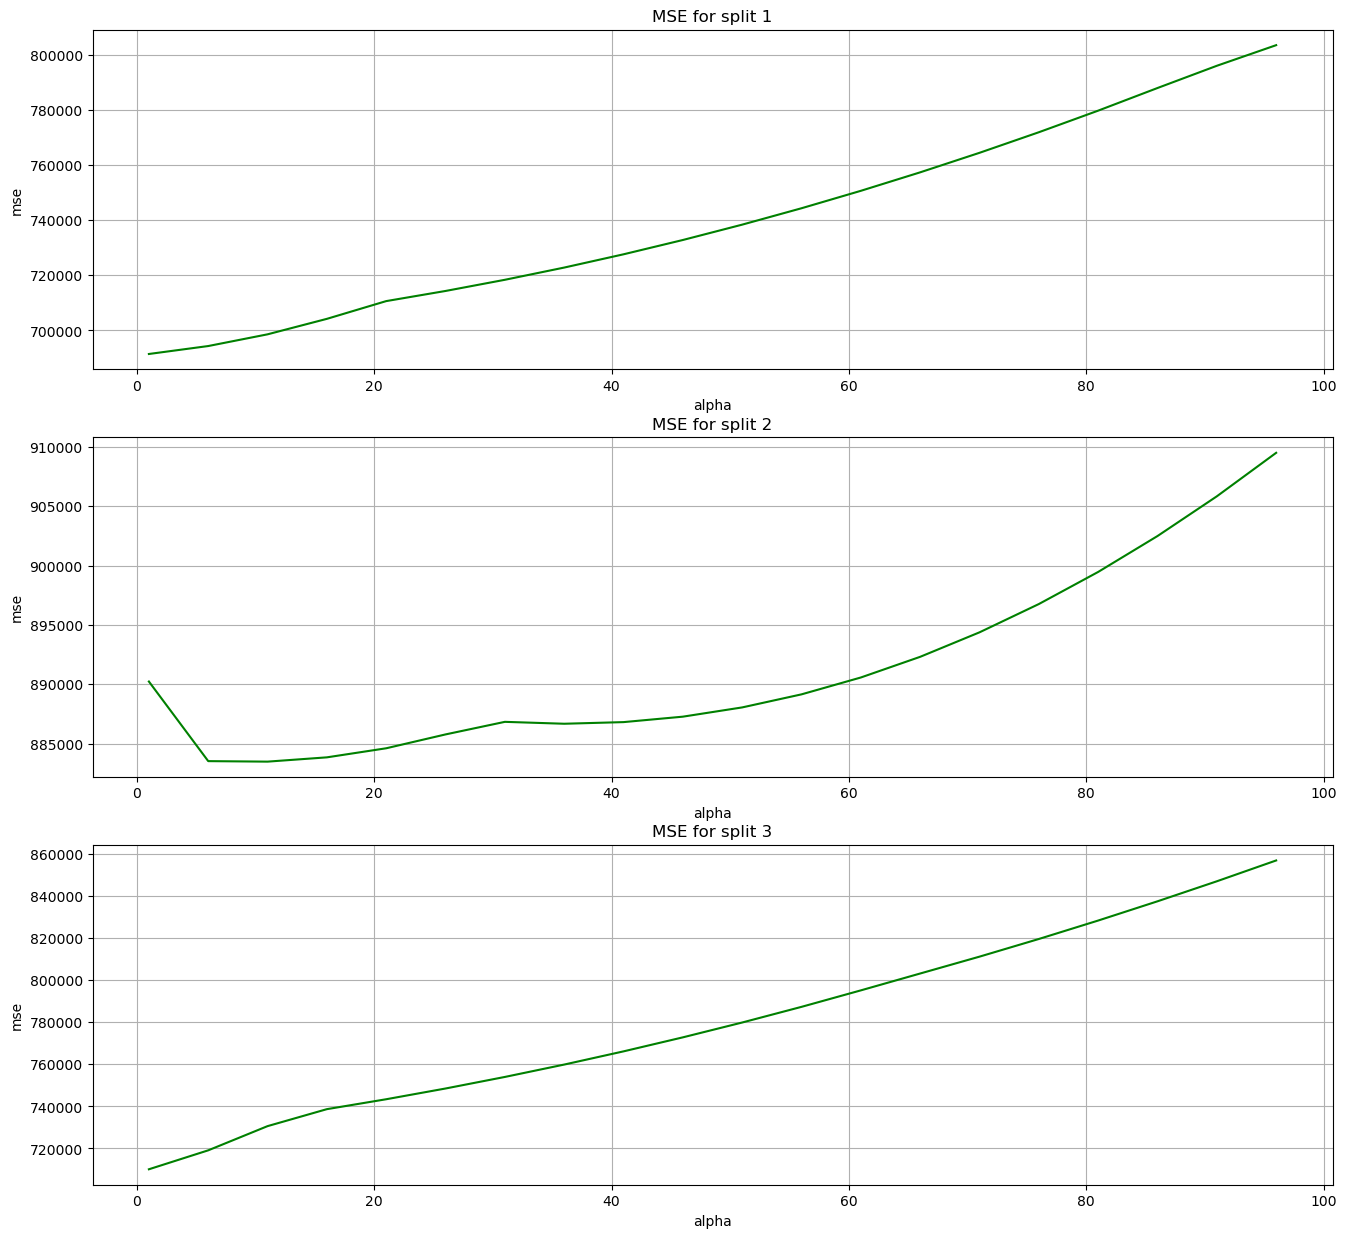

In [30]:
for i in range(3):
    plt.rcParams["figure.figsize"] = (16, 15)
    plt.subplot(3, 1, i+1)
    plt.plot(regressor.alphas_, regressor.mse_path_[:, i], c='g')
    plt.title(f'MSE for split {i+1}')
    plt.xlabel('alpha')
    plt.ylabel('mse')
    plt.grid()

for alpha, mse in enumerate(np.min(regressor.mse_path_, axis=0)):
    alpha_min = regressor.mse_path_[:, alpha].argmin(axis=0)
    print(f'Alpha = {regressor.alphas_[alpha_min]}, MSE = {mse}')

In [ ]:
#Завдання 10:

Питання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей cnt від цих ознак, які ми малювали в блоці "Знайомство з даними". Чи видно зростаючу лінійну залежність cnt від цих ознак за графіками? Чи логічно стверджувати (зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

In [31]:
#('yr', 1019.4634940657195), ('atemp', 576.530793504551), ('season', 560.2416160308857), ('temp', 376.36323620969864)
#Лінійну залежність з графіків видно. Стверджувати так можна лише про atemp.

Питання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться відповідні візуалізації. Чи видно лінійну залежність, яка зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

In [32]:
#('weathersit', -332.3698569623487), ('windspeed(mph)', -197.1396894024843), ('hum', -144.12915500348578)
#Залежність видно лише у weathersit. Стверджувати так можна.

Питання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (<1e-3). Як ви вважаєте, чому модель виключила їх із моделі (знов подивіться на графіки)? Чи правда, що вони не впливають на попит на велосипеди?

In [33]:
#('windspeed(ms)', -2.805139889577359e-08)
#Ознака, в цілому, не впливає на попит на велосипеди

In [ ]:
#Висновок: lasso та ridge - це моделі лінійної регрессії, що викорстовуються для запобігання проблем зміщення та дисперсії.
#Обидві моделі додають штрафний коефіцієнт.
#У lasso він дорівнює сумі модулів коефіцієнтів, і церез це може обнуляти недостатньо вагогмі з них, залишаючи лише ті, що мають реальний вплив.
#У ridge він дорівнює квадратному кореню суми квадратів коефіцієнтів, завдяки чому усі коефіцієнти залишаться на місці
#lasso краще підійде для моделей, що мають декілька характеристик з високим впливом та характеристики з низьким, оскільки останні будуть обнулені.
#ridge краще використовувати тоді, коли всы коефіцєнти з вибірки мають користь, адже ridge не обнулює їх